In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [7]:
churn_data = pd.read_csv('/Users/rjpathak/Downloads/churn_data.csv')
customer_data = pd.read_csv('/Users/rjpathak/Downloads/customer_data.csv')
internet_data = pd.read_csv('/Users/rjpathak/Downloads/internet_data.csv')

In [8]:
df_1 = pd.merge(churn_data, customer_data, how = 'inner', on = 'customerID')

In [9]:
telecom = pd.merge(df_1, internet_data, how = 'inner', on = 'customerID')
telecom_T = telecom.copy() 

In [10]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [11]:
telecom.shape

(7043, 21)

In [12]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [13]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [14]:
varlist = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
def binary_map(x):
    return x.map({'Yes':1, 'No':0})
telecom[varlist] = telecom[varlist].apply(binary_map)

In [15]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [16]:
dummy_1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService' ]], drop_first = True).astype(int)
telecom = pd.concat([telecom, dummy_1], axis =1)

In [17]:
telecom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   Contract                               7043 non-null   object 
 4   PaperlessBilling                       7043 non-null   int64  
 5   PaymentMethod                          7043 non-null   object 
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   object 
 8   Churn                                  7043 non-null   int64  
 9   gender                                 7043 non-null   object 
 10  SeniorCitizen                          7043 non-null   int64  
 11  Part

In [18]:
a = pd.get_dummies(telecom['MultipleLines'], prefix = 'MultipleLines').astype(int)
a1 = a.drop(['MultipleLines_No phone service'], axis = 1)

In [19]:
telecom = pd.concat([telecom, a1], axis = 1)

In [20]:
b = pd.get_dummies(telecom['OnlineSecurity'], prefix = 'OnlineSecurity').astype(int)

In [21]:
b2 = b.drop(['OnlineSecurity_No internet service'], axis = 1)

In [22]:
telecom = pd.concat([telecom, b2], axis = 1)


In [23]:
c = pd.get_dummies(telecom['OnlineBackup'], prefix = 'OnlineBackup').astype(int)

In [24]:
c3 = c.drop(['OnlineBackup_No internet service'], axis = 1)


In [25]:
telecom = pd.concat([telecom, c3], axis = 1)

In [26]:
d =  pd.get_dummies(telecom['DeviceProtection'], prefix = 'DeviceProtection').astype(int)

In [27]:
d4 = d.drop(['DeviceProtection_No internet service'], axis = 1)

In [28]:
telecom = pd.concat([telecom, d4], axis = 1)

In [29]:
e = pd.get_dummies(telecom['TechSupport'], prefix = 'TechSupport').astype(int)


In [30]:
e5 = e.drop(['TechSupport_No internet service'], axis = 1)

In [31]:
telecom = pd.concat([telecom, e5], axis = 1)

In [32]:
f = pd.get_dummies(telecom['StreamingTV'], prefix = 'StreamingTV').astype(int)


In [33]:
f6 = f.drop(['StreamingTV_No internet service'], axis = 1)

In [34]:
telecom = pd.concat([telecom, f6], axis = 1)

In [35]:
g = pd.get_dummies(telecom['StreamingMovies'], prefix = 'StreamingMovies').astype(int)

In [36]:
g7 = g.drop(['StreamingMovies_No internet service'], axis = 1)

In [37]:
telecom = pd.concat([telecom, g7], axis = 1)

In [38]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [39]:
telecom = telecom.drop(['StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'Contract', 'PaymentMethod', 'gender', 'InternetService'], axis = 1) 

In [40]:
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')


In [41]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   int64  
 11  Cont

In [42]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [43]:
num_telecom = telecom[['SeniorCitizen', 'tenure', 'TotalCharges', 'MonthlyCharges']]

In [44]:
num_telecom.describe(percentiles = [.25, .5, .75, .9, .95, .99] )

,SeniorCitizen,tenure,TotalCharges,MonthlyCharges
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,2283.300441,64.761692
std,0.368612,24.559481,2266.771362,30.090047
min,0.000000,0.000000,18.800000,18.250000
25%,0.000000,9.000000,401.450000,35.500000
50%,0.000000,29.000000,1397.475000,70.350000
75%,0.000000,55.000000,3794.737500,89.850000
90%,1.000000,69.000000,5976.640000,102.600000
95%,1.000000,72.000000,6923.590000,107.400000
99%,1.000000,72.000000,8039.883000,114.729000


In [45]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [46]:
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [47]:
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [48]:
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = telecom.drop(['Churn', 'customerID'], axis =1)

In [51]:
y = telecom['Churn']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, random_state = 100)

In [53]:
X_train.shape

(4922, 30)

In [54]:
y_train.shape

(4922,)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
X_train[['tenure', 'TotalCharges', 'MonthlyCharges']] = scaler.fit_transform(X_train[['tenure', 'TotalCharges', 'MonthlyCharges']])

In [57]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [58]:
Churn = (sum(telecom['Churn'])/ len(telecom['Churn'].index))*100
Churn

26.578498293515356

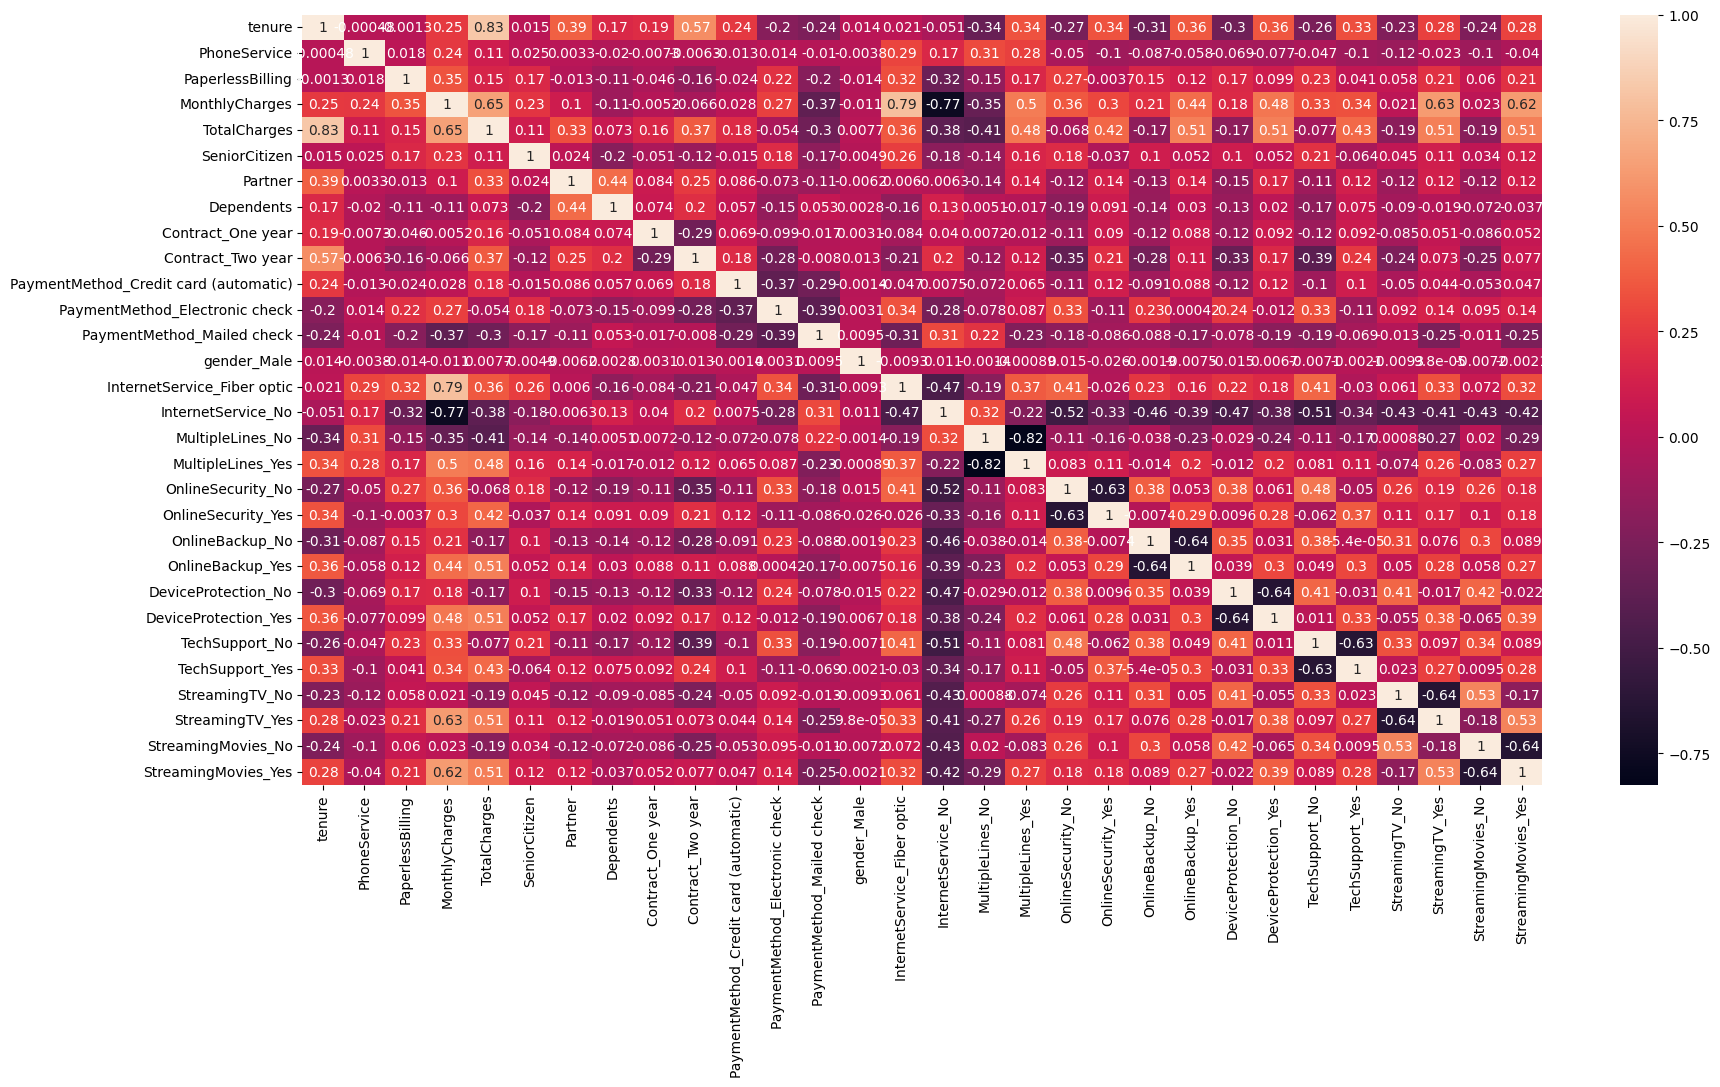

In [59]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [ ]:
X_test = X_test.drop(['MultipleLines_No', 'OnlineBackup_No', 'DeviceProtection_No', 'StreamingMovies_No', 'StreamingTV_No', 'TechSupport_No', 'OnlineSecurity_No'], axis = 1)

In [ ]:
X_train = X_train.drop(['MultipleLines_No', 'OnlineBackup_No', 'DeviceProtection_No', 'StreamingMovies_No', 'StreamingTV_No', 'TechSupport_No', 'OnlineSecurity_No'], axis = 1)

In [83]:
X_train = X_train.drop(['OnlineSecurity_No'], axis = 1)

In [ ]:
X_test = X_test.drop(['OnlineSecurity_No'], axis = 1)

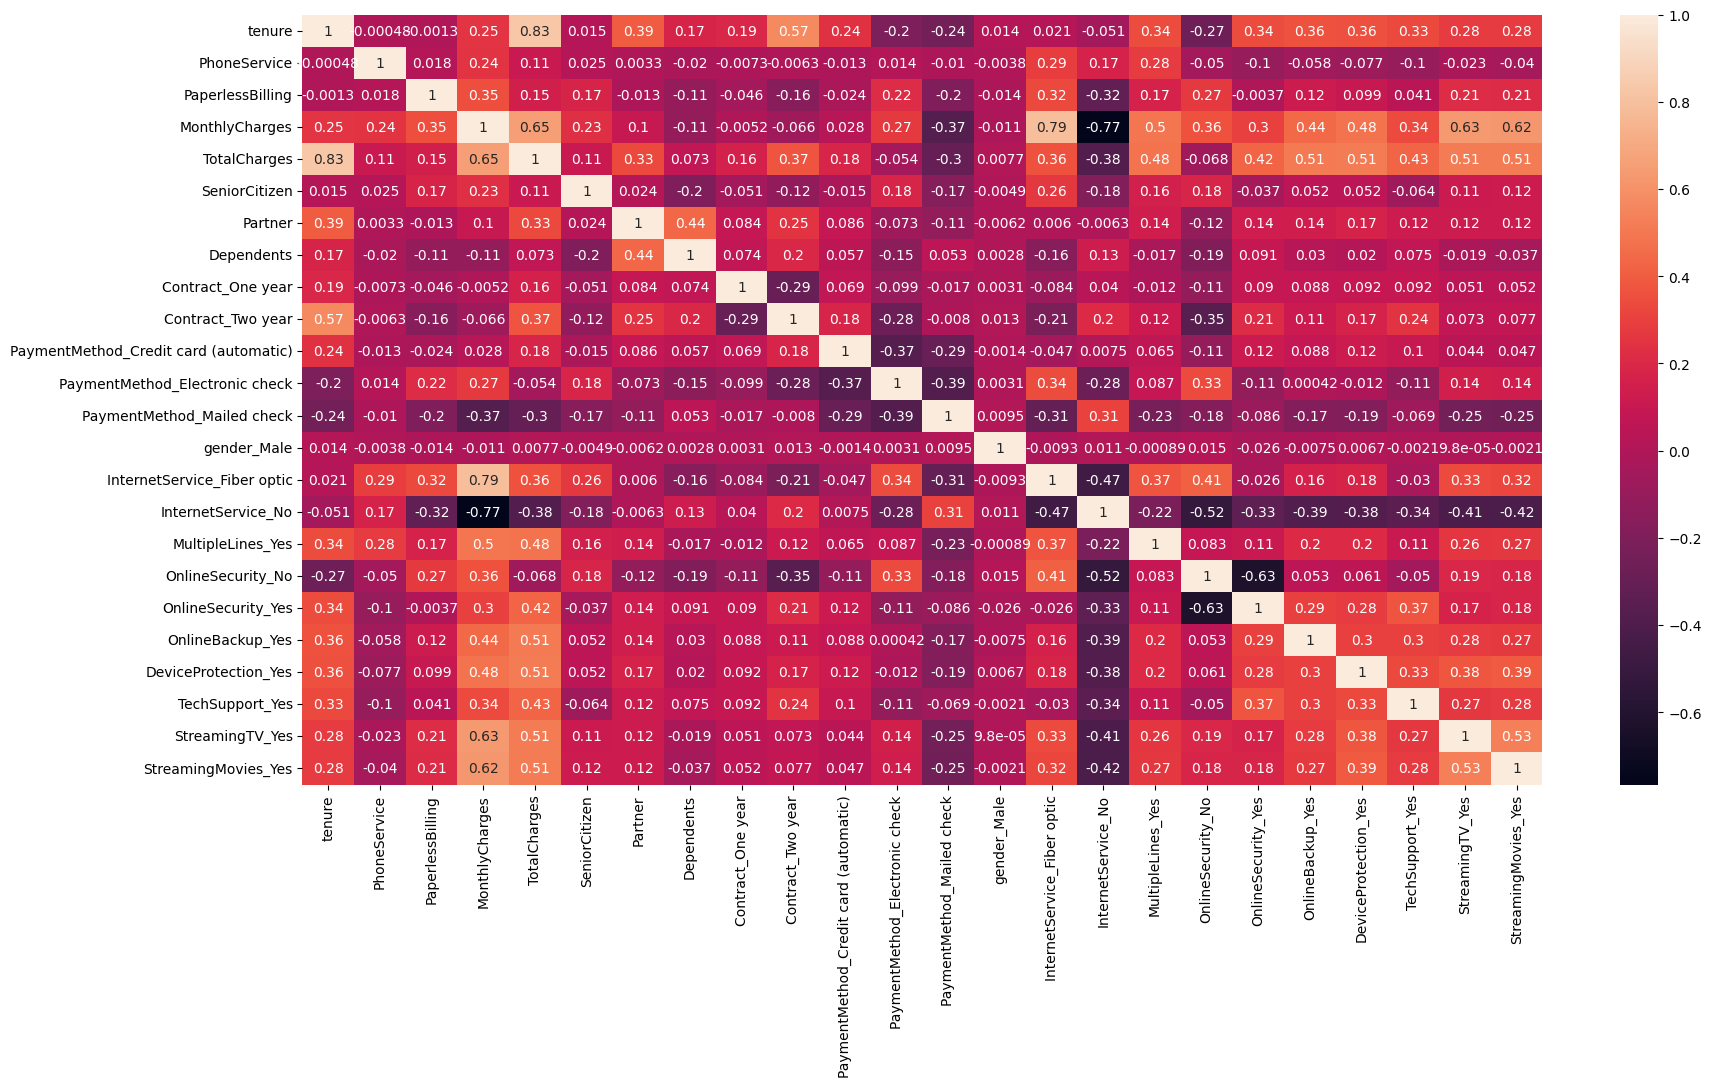

In [62]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [85]:
import statsmodels.api as sm


In [86]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sat, 05 Oct 2024   Deviance:                       4009.4
Time:                        17:01:16   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() 

In [88]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [89]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True])

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', np.True_, np.int64(1)),
 ('PhoneService', np.False_, np.int64(3)),
 ('PaperlessBilling', np.True_, np.int64(1)),
 ('MonthlyCharges', np.True_, np.int64(1)),
 ('TotalCharges', np.True_, np.int64(1)),
 ('SeniorCitizen', np.True_, np.int64(1)),
 ('Partner', np.False_, np.int64(7)),
 ('Dependents', np.False_, np.int64(6)),
 ('Contract_One year', np.True_, np.int64(1)),
 ('Contract_Two year', np.True_, np.int64(1)),
 ('PaymentMethod_Credit card (automatic)', np.True_, np.int64(1)),
 ('PaymentMethod_Electronic check', np.False_, np.int64(4)),
 ('PaymentMethod_Mailed check', np.True_, np.int64(1)),
 ('gender_Male', np.False_, np.int64(8)),
 ('InternetService_Fiber optic', np.True_, np.int64(1)),
 ('InternetService_No', np.True_, np.int64(1)),
 ('MultipleLines_Yes', np.True_, np.int64(1)),
 ('OnlineSecurity_Yes', np.False_, np.int64(2)),
 ('OnlineBackup_Yes', np.False_, np.int64(5)),
 ('DeviceProtection_Yes', np.False_, np.int64(9)),
 ('TechSupport_Yes', np.True_, np.int64(1)),
 ('

In [91]:
col = X_train.columns[rfe.support_]

In [92]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

In [93]:
col

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [94]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Sat, 05 Oct 2024   Deviance:                       4022.2
Time:                        17:01:30   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

In [95]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [96]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19264205, 0.27562384, 0.59950707, 0.51357126, 0.64823272,
       0.41484553, 0.43118361, 0.80178789, 0.22819404, 0.50457542])

In [98]:
y_train_pred_f = pd.DataFrame({'Churn': y_train.values, 'Churn_prob': y_train_pred})
y_train_pred_f['CustID'] = y_train.index
y_train_pred_f.head()

,Churn,Churn_prob,CustID
0,0,0.192642,879
1,0,0.275624,5790
2,1,0.599507,6498
3,1,0.513571,880
4,1,0.648233,2784


In [99]:
y_train_pred_f['Predicted'] = y_train_pred_f.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)

In [100]:
y_train_pred_f.head()

,Churn,Churn_prob,CustID,Predicted
0,0,0.192642,879,0
1,0,0.275624,5790,0
2,1,0.599507,6498,1
3,1,0.513571,880,1
4,1,0.648233,2784,1


In [101]:
from sklearn import metrics

In [105]:
confusion = metrics.confusion_matrix(y_train_pred_f.Churn,  y_train_pred_f.Predicted)
print(confusion)

[[3275  360]
 [ 574  713]]


In [106]:
print(metrics.accuracy_score(y_train_pred_f.Churn,  y_train_pred_f.Predicted))

0.8102397399431126


In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,MonthlyCharges,14.85
3,TotalCharges,10.42
0,tenure,7.38
9,InternetService_Fiber optic,5.61
10,InternetService_No,5.27
6,Contract_Two year,3.14
13,StreamingTV_Yes,2.79
14,StreamingMovies_Yes,2.79
1,PaperlessBilling,2.76
11,MultipleLines_Yes,2.38


In [115]:
col = col.drop('MonthlyCharges', 1)

In [116]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res2 = logm3.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Sat, 05 Oct 2024   Deviance:                       4046.2
Time:                        17:35:37   Pearson chi2:                 5.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2790
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5971      0.130    -12.296      0.000      -1.852      -1.343
tenure                                   -1.3286      0.180     -7.401      0.000      -1.681      -0.977
PaperlessBilling                          0.3533      0.089      3.958      0.000       0.178       0.528
TotalCharges                              0.4347      0.186      2.340      0.019       0.071       0.799
SeniorCitizen                             0.4569      0.099      4.601      0.000       0.262       0.652
Contract_One year                        -0.7289      0.127     -5.729      0.000      -0.978      -0.480
Contract_Two year                        -1.3277      0.210     -6.322      0.000      -1.739      -0.916
PaymentMethod_Credit card (automatic)    -0.3870      0.112     -3.442      0.001      -0.607      -0.167
PaymentMethod_Mailed check               -0.3618      0.110     -3.274      0.001      -0.578      -0.145
InternetService_Fiber optic               0.6888      0.109      6.297      0.000       0.474       0.903
InternetService_No                       -0.9555      0.156     -6.120      0.000      -1.262      -0.649
MultipleLines_Yes                         0.1700      0.094      1.814      0.070      -0.014       0.354
TechSupport_Yes                          -0.4371      0.101     -4.307      0.000      -0.636      -0.238
StreamingTV_Yes                           0.2881      0.096      2.996      0.003       0.100       0.477
StreamingMovies_Yes                       0.1944      0.096      2.031      0.042       0.007       0.382
=========================================================================================================
"""

In [124]:
y_train_pred = res2.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.24581699, 0.26536078, 0.66940978, 0.63097033, 0.68291606,
       0.39952622, 0.27582791, 0.79816753, 0.19878625, 0.52911878])

In [125]:
y_train_pred_f['Churn_prob'] = y_train_pred

In [126]:
y_train_pred_f['Predicted'] = y_train_pred_f.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)

In [127]:
print(metrics.accuracy_score(y_train_pred_f.Churn,  y_train_pred_f.Predicted))

0.8061763510767981


In [135]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.98
7,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
1,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
0,tenure,2.04
8,InternetService_No,2.03
10,TechSupport_Yes,1.92
3,Contract_One year,1.78


In [ ]:
col = col.drop('TotalCharges', 1)

In [130]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res2 = logm4.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Sat, 05 Oct 2024   Deviance:                       4051.9
Time:                        17:43:40   Pearson chi2:                 5.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2782
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6577      0.127    -13.094      0.000      -1.906      -1.410
tenure                                   -0.9426      0.065    -14.480      0.000      -1.070      -0.815
PaperlessBilling                          0.3455      0.089      3.877      0.000       0.171       0.520
SeniorCitizen                             0.4597      0.100      4.613      0.000       0.264       0.655
Contract_One year                        -0.7218      0.127     -5.702      0.000      -0.970      -0.474
Contract_Two year                        -1.2987      0.208     -6.237      0.000      -1.707      -0.891
PaymentMethod_Credit card (automatic)    -0.3874      0.113     -3.442      0.001      -0.608      -0.167
PaymentMethod_Mailed check               -0.3307      0.110     -3.020      0.003      -0.545      -0.116
InternetService_Fiber optic               0.8052      0.097      8.272      0.000       0.614       0.996
InternetService_No                       -0.9726      0.155     -6.261      0.000      -1.277      -0.668
MultipleLines_Yes                         0.2097      0.092      2.279      0.023       0.029       0.390
TechSupport_Yes                          -0.4046      0.101     -4.019      0.000      -0.602      -0.207
StreamingTV_Yes                           0.3390      0.094      3.619      0.000       0.155       0.523
StreamingMovies_Yes                       0.2428      0.093      2.598      0.009       0.060       0.426
=========================================================================================================
"""

In [131]:
y_train_pred = res2.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.24581699, 0.26536078, 0.66940978, 0.63097033, 0.68291606,
       0.39952622, 0.27582791, 0.79816753, 0.19878625, 0.52911878])

In [132]:
y_train_pred_f['Churn_prob'] = y_train_pred

In [133]:
y_train_pred_f['Predicted'] = y_train_pred_f.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)

In [134]:
print(metrics.accuracy_score(y_train_pred_f.Churn,  y_train_pred_f.Predicted))

0.8061763510767981


In [136]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.98
7,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
1,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
0,tenure,2.04
8,InternetService_No,2.03
10,TechSupport_Yes,1.92
3,Contract_One year,1.78


In [137]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [142]:
sen = (TP/float(TP+FN))
print(sen)

0.554001554001554


In [143]:
sep = print(TN/float(TN+FP))
sep

0.9009628610729024


In [144]:
print(FP/float(TN+FP))

0.09903713892709766


In [145]:
print(TP/float(TP+FP))

0.6644920782851818


In [146]:
print(TN/float(TN+FN))

0.8508703559366069


In [147]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

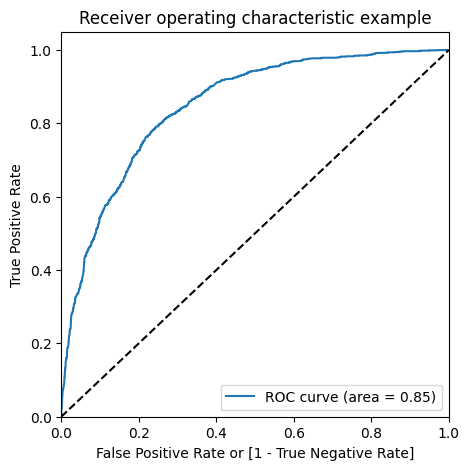

In [149]:
draw_roc(y_train_pred_f.Churn, y_train_pred_f.Churn_prob)


In [150]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_f[i] = y_train_pred_f.Churn_prob.map(lambda x : 1 if x > i else 0)
y_train_pred_f.head()

,Churn,Churn_prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0
4,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0


In [151]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

In [152]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_f.Churn, y_train_pred_f[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.614994  0.943279  0.498762
0.2   0.2  0.721861  0.846154  0.677854
0.3   0.3  0.770012  0.776224  0.767813
0.4   0.4  0.790532  0.636364  0.845117
0.5   0.5  0.806176  0.536131  0.901788
0.6   0.6  0.798050  0.380730  0.945805
0.7   0.7  0.776310  0.196581  0.981568
0.8   0.8  0.747867  0.041181  0.998074
0.9   0.9  0.738521  0.000000  1.000000


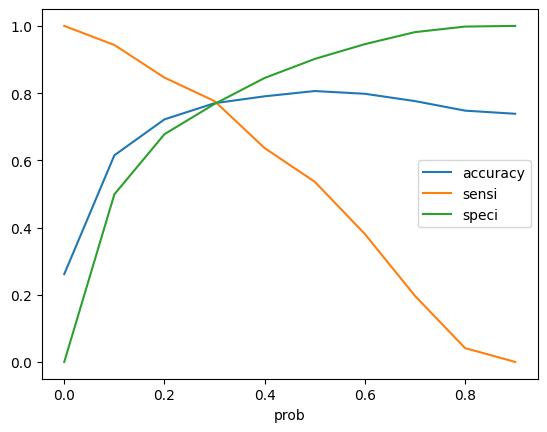

In [153]:
cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'sensi', 'speci'])
plt.show()

In [158]:
y_train_pred_f['Predicted'] = y_train_pred_f.Churn_prob.map(lambda x: 1 if x > 0.3 else 0)

In [160]:
confusion = metrics.confusion_matrix(y_train_pred_f.Churn,  y_train_pred_f.Predicted)
print(confusion)

[[2791  844]
 [ 288  999]]


In [159]:
print(metrics.accuracy_score(y_train_pred_f.Churn,  y_train_pred_f.Predicted))

0.7700121901665989


In [161]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [162]:
sen = (TP/float(TP+FN))
print(sen)

0.7762237762237763


In [173]:
scaler = StandardScaler()
X_test[['tenure', 'TotalCharges', 'MonthlyCharges']] = scaler.fit_transform(X_test[['tenure', 'TotalCharges', 'MonthlyCharges']])

In [174]:
X_test = X_test[col]

In [175]:
X_test_sm = sm.add_constant(X_test)

In [176]:
y_test_pred = res2.predict(X_test_sm)

In [177]:
y_test_pred[:10]

942     0.416316
3730    0.258890
1761    0.008592
2283    0.588052
1872    0.013846
1970    0.689127
2532    0.283175
1616    0.008924
2485    0.598433
5914    0.143449
dtype: float64

In [179]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [180]:
y_pred_1.head()

,0
942,0.416316
3730,0.258890
1761,0.008592
2283,0.588052
1872,0.013846


In [181]:
y_test_df = pd.DataFrame(y_test)

In [182]:
y_test_df['CustID'] = y_test_df.index

In [183]:
y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [184]:
y_pred_f = pd.concat([y_test_df, y_pred_1], axis = 1)

In [185]:
y_pred_f.head()

,Churn,CustID,0
0,0,942,0.416316
1,1,3730,0.258890
2,0,1761,0.008592
3,1,2283,0.588052
4,0,1872,0.013846


In [188]:
y_pred_f = y_pred_f.rename(columns = { 0 : 'Churn_prob'} )

In [189]:
y_pred_f.head()

,Churn,CustID,Churn_prob
0,0,942,0.416316
1,1,3730,0.258890
2,0,1761,0.008592
3,1,2283,0.588052
4,0,1872,0.013846


In [192]:
y_pred_f = y_pred_f.reindex(columns = ['CustID', 'Churn', 'Churn_prob'])

In [193]:
y_pred_f.head()

,CustID,Churn,Churn_prob
0,942,0,0.416316
1,3730,1,0.258890
2,1761,0,0.008592
3,2283,1,0.588052
4,1872,0,0.013846


In [194]:
y_pred_f['Final_Predicted'] = y_pred_f.Churn_prob.map(lambda x: 1 if x > 0.3 else 0)

In [195]:
y_pred_f.head()

,CustID,Churn,Churn_prob,Final_Predicted
0,942,0,0.416316,1
1,3730,1,0.258890,0
2,1761,0,0.008592,0
3,2283,1,0.588052,1
4,1872,0,0.013846,0


In [196]:
metrics.accuracy_score(y_pred_f.Churn, y_pred_f.Final_Predicted)

0.7436018957345971

In [199]:
confusion2 = metrics.confusion_matrix(y_pred_f.Churn,  y_pred_f.Final_Predicted)
print(confusion2)

[[1151  377]
 [ 164  418]]


In [201]:
TP_ = confusion2[1,1]  
TN_ = confusion2[0,0] 
FP_ = confusion2[0,1] 
FN_ = confusion2[1,0]

In [202]:
sen_ = (TP_/float(TP_+FN_))
print(sen_)

0.718213058419244


In [203]:
sep_ = print(TN_/float(TN_+FP_))
sep_

0.7532722513089005
